# New Section

In [ ]:
from google.colab import drive
import zipfile
import os

import pandas as pd
import numpy as np
from random import randint

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.feature_selection import RFECV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def unzip_file(zip_path):
    """
    Unzips a file to the same directory where the zip file is located.

    Parameters:
    - zip_path: The full path to the zip file.
    """
    if not os.path.exists(zip_path):
        print("The zip file does not exist.")
        return

    directory_to_extract_to = '/content/'

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(directory_to_extract_to)

unzip_file('/content/drive/MyDrive/Nature Inspired Computing/train_identity.csv.zip')
unzip_file('/content/drive/MyDrive/Nature Inspired Computing/train_transaction.csv.zip')

In [ ]:
df_identities = pd.read_csv('/content/train_identity.csv')
df_transactions = pd.read_csv('/content/train_transaction.csv')

In [ ]:
df_identities.head(3)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows


In [ ]:
df_transactions.head(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = pd.merge(df_transactions, df_identities, on='TransactionID', how='left')

In [ ]:
print(f'Transactions shape: {df_transactions.shape}')
print(f'Identities shape: {df_identities.shape}')

Transactions shape: (590540, 394)
Identities shape: (144233, 41)


In [ ]:
df.isFraud.value_counts()

isFraud
0    569877
1     20663
Name: count, dtype: int64

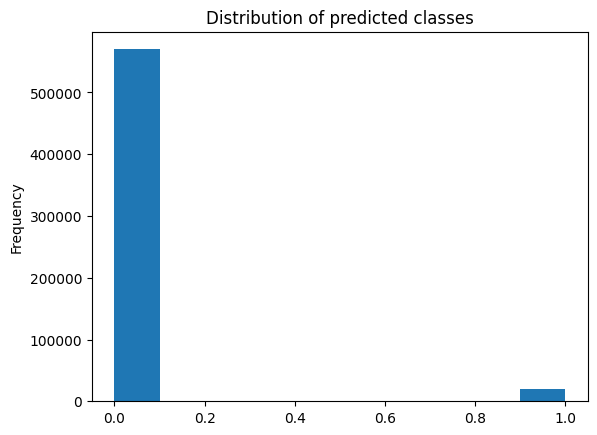

In [ ]:
df.isFraud.plot(kind='hist', title='Distribution of predicted classes');

In [ ]:
fig = px.bar(df.isnull().sum(), x=df.columns, y=df.isnull().sum().values)
fig.update_layout(title='Number of Missing Values in Each Column',
xaxis_title='Column Name',
yaxis_title='Number of Missing Values')
fig.show()

In [ ]:
def kdeplot_per_classes(df, attribute, groupby, title=None, ticks_rotation=0, ax=None):
    """
    Draw kdeplot of attribute per each class.

    :param df: dataframe with data to be drawn on kdeplot.
    :param attribute: name of attribute to be drawn on kdeplot.
    :param groupby: name of attribute with predicted classes.
    :param title: title of plot.
    :param ticks_rotation: rotation of x-ticks (labels).
    :param ax: matplotlib Axes object to draw the plot onto.
    """
    for x in df[groupby].unique():
        sns.kdeplot(df[df[groupby] == x][attribute], label=x, shade=True, shade_lowest=False)
    plt.title(title)


<ipython-input-15-1ecaa133294e>:13: UserWarning:



`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-15-1ecaa133294e>:13: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-15-1ecaa133294e>:13: UserWarning:



`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-15-1ecaa133294e>:13: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




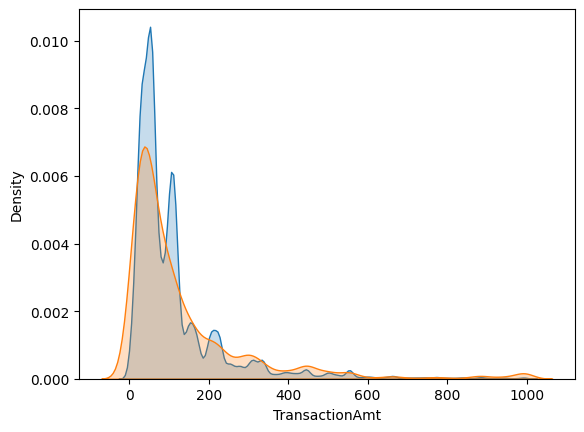

In [ ]:
kdeplot_per_classes(df[df.TransactionAmt < 1000], 'TransactionAmt', 'isFraud')

<ipython-input-15-1ecaa133294e>:13: UserWarning:



`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-15-1ecaa133294e>:13: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-15-1ecaa133294e>:13: UserWarning:



`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-15-1ecaa133294e>:13: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




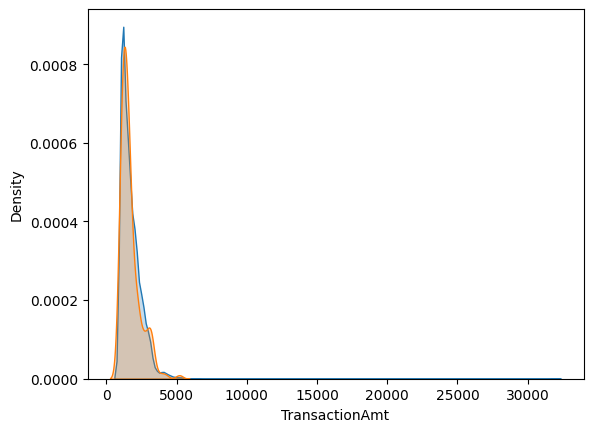

In [ ]:
kdeplot_per_classes(df[df.TransactionAmt > 1000], 'TransactionAmt', 'isFraud')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def barplot_per_classes(df, attribute, groupby, title=None, ticks_rotation=0, topn=None, ax=None):
    """
    Draw barplot of attribute per each class.

    :param df: dataframe with data to be drawn on barplot.
    :param attribute: name of attribute to be drawn on barplot.
    :param groupby: name of attribute with predicted classes.
    :param ticks_rotation: rotation of x-ticks (labels).
    :param topn: number of top categories to be drawn.
    :param ax: matplotlib Axes object to draw the plot onto.
    """
    if ax is None:
        ax = plt.gca()  # Get current axis if none is provided

    # Filter the data to the top n values if specified
    if topn is not None:
        uniq_values = df[attribute].value_counts().head(topn).index
        df = df[df[attribute].isin(uniq_values)]

    # Calculate the percentages
    data = df.groupby([groupby, attribute]).size().reset_index(name='counts')
    total = data.groupby(groupby)['counts'].transform('sum')
    data['percentage'] = data['counts'] / total * 100

    # Create the bar plot
    sns.barplot(x=attribute, y='percentage', hue=groupby, data=data, ax=ax)

    if title:
        ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=ticks_rotation)

<ipython-input-18-f4883adcdd2b>:33: UserWarning:

FixedFormatter should only be used together with FixedLocator



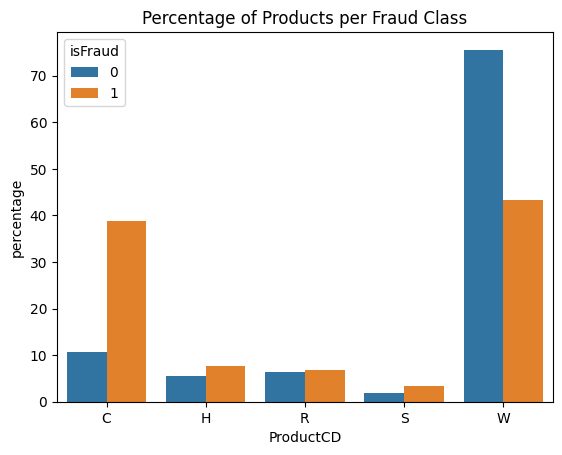

In [ ]:
barplot_per_classes(df, 'ProductCD', 'isFraud', title='Percentage of Products per Fraud Class')

In [ ]:
import gc
gc.collect()

5057

# Data Preprocessing


In [ ]:
def drop_attributes(df, threshold):
    missing_values_ratio = df.isnull().mean()
    drop_cols = missing_values_ratio[missing_values_ratio > threshold].index
    return df.drop(columns=drop_cols)

def merge_categories(series, threshold, replacement):
    category_counts = series.value_counts(normalize=True)
    small_categories = category_counts[category_counts < threshold].index
    merge_dict = {cat: replacement for cat in small_categories}
    return series.replace(merge_dict)

def preprocess_numerical(df, threshold=0.5):
    df = drop_attributes(df, threshold)
    imputer = SimpleImputer(strategy='mean')
    numerical_cols = df.select_dtypes(include='number').columns
    df[numerical_cols] = imputer.fit_transform(df[numerical_cols])
    return df[numerical_cols]

def preprocess_categorical(df, threshold=0.5, merge_threshold=0.05, merge_replacement='Other'):
    df = drop_attributes(df, threshold)
    processed_cols = pd.DataFrame()
    for col in df.select_dtypes(include='object').columns:
        processed_col = merge_categories(df[col], merge_threshold, merge_replacement)
        processed_col.fillna(processed_col.mode()[0], inplace=True)
        processed_col = pd.get_dummies(processed_col, drop_first=True, prefix=col)
        processed_cols = pd.concat([processed_cols, processed_col], axis=1)
    return processed_cols

preprocessed_numerical_df = preprocess_numerical(df)

preprocessed_categorical_df = preprocess_categorical(df)

print("Preprocessed numerical columns:")
print(preprocessed_numerical_df)

print("\nPreprocessed categorical columns:")
print(preprocessed_categorical_df)


Preprocessed numerical columns:
        TransactionID  isFraud  TransactionDT  TransactionAmt    card1  \
0           2987000.0      0.0        86400.0           68.50  13926.0   
1           2987001.0      0.0        86401.0           29.00   2755.0   
2           2987002.0      0.0        86469.0           59.00   4663.0   
3           2987003.0      0.0        86499.0           50.00  18132.0   
4           2987004.0      0.0        86506.0           50.00   4497.0   
...               ...      ...            ...             ...      ...   
590535      3577535.0      0.0     15811047.0           49.00   6550.0   
590536      3577536.0      0.0     15811049.0           39.50  10444.0   
590537      3577537.0      0.0     15811079.0           30.95  12037.0   
590538      3577538.0      0.0     15811088.0          117.00   7826.0   
590539      3577539.0      0.0     15811131.0          279.95  15066.0   

             card2  card3  card5  addr1  addr2  ...   V312        V313  \
0    

In [ ]:
preprocessed_df = pd.concat([preprocessed_numerical_df, preprocessed_categorical_df], axis=1)

print("Preprocessed DataFrame:")
preprocessed_df

Preprocessed DataFrame:


,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,P_emaildomain_aol.com,P_emaildomain_gmail.com,P_emaildomain_hotmail.com,P_emaildomain_yahoo.com,M1_T,M2_T,M3_T,M4_M1,M4_M2,M6_T
0,2987000.0,0.0,86400.0,68.50,13926.0,362.555488,150.0,142.0,315.0,87.0,...,False,True,False,False,True,True,True,False,True,True
1,2987001.0,0.0,86401.0,29.00,2755.0,404.000000,150.0,102.0,325.0,87.0,...,False,True,False,False,True,True,True,False,False,True
2,2987002.0,0.0,86469.0,59.00,4663.0,490.000000,150.0,166.0,330.0,87.0,...,False,False,False,False,True,True,True,False,False,False
3,2987003.0,0.0,86499.0,50.00,18132.0,567.000000,150.0,117.0,476.0,87.0,...,False,False,False,True,True,True,True,False,False,False
4,2987004.0,0.0,86506.0,50.00,4497.0,514.000000,150.0,102.0,420.0,87.0,...,False,True,False,False,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535.0,0.0,15811047.0,49.00,6550.0,362.555488,150.0,226.0,272.0,87.0,...,False,True,False,False,True,True,True,False,False,False
590536,3577536.0,0.0,15811049.0,39.50,10444.0,225.000000,150.0,224.0,204.0,87.0,...,False,True,False,False,True,False,False,False,False,True
590537,3577537.0,0.0,15811079.0,30.95,12037.0,595.000000,150.0,224.0,231.0,87.0,...,False,True,False,False,True,False,False,False,False,True
590538,3577538.0,0.0,15811088.0,117.00,7826.0,481.000000,150.0,224.0,387.0,87.0,...,True,False,False,False,True,True,True,False,False,True


In [ ]:
preprocessed_df.to_csv('preprocessed_data.csv', index=False)

print("CSV file 'preprocessed_data.csv' has been created.")

CSV file 'preprocessed_data.csv' has been created.


In [ ]:
del df

In [ ]:
gc.collect()

0

In [ ]:
df_preprocessed = pd.read_csv('/content/preprocessed_data.csv')

In [ ]:
df_preprocessed = df_preprocessed.head(3000)

In [ ]:
df_preprocessed

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,P_emaildomain_aol.com,P_emaildomain_gmail.com,P_emaildomain_hotmail.com,P_emaildomain_yahoo.com,M1_T,M2_T,M3_T,M4_M1,M4_M2,M6_T
0,2987000.0,0.0,86400.0,68.50,13926.0,362.555488,150.0,142.0,315.0,87.0,...,False,True,False,False,True,True,True,False,True,True
1,2987001.0,0.0,86401.0,29.00,2755.0,404.000000,150.0,102.0,325.0,87.0,...,False,True,False,False,True,True,True,False,False,True
2,2987002.0,0.0,86469.0,59.00,4663.0,490.000000,150.0,166.0,330.0,87.0,...,False,False,False,False,True,True,True,False,False,False
3,2987003.0,0.0,86499.0,50.00,18132.0,567.000000,150.0,117.0,476.0,87.0,...,False,False,False,True,True,True,True,False,False,False
4,2987004.0,0.0,86506.0,50.00,4497.0,514.000000,150.0,102.0,420.0,87.0,...,False,True,False,False,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2989995.0,0.0,151402.0,300.00,12037.0,595.000000,150.0,224.0,231.0,87.0,...,False,False,False,True,True,True,True,False,False,False
2996,2989996.0,0.0,151420.0,35.95,14415.0,481.000000,150.0,224.0,436.0,87.0,...,False,True,False,False,True,True,True,False,False,False
2997,2989997.0,0.0,151422.0,117.00,12725.0,325.000000,150.0,226.0,204.0,87.0,...,False,False,True,False,True,True,True,False,False,False
2998,2989998.0,0.0,151431.0,29.00,7919.0,194.000000,150.0,166.0,181.0,87.0,...,False,True,False,False,True,True,True,True,False,False


In [ ]:
X = df_preprocessed.drop('isFraud', axis=1)
y = df_preprocessed['isFraud']

# New Section

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def random_undersample(x, y):
    """
    Undersample data by random choosing samples from majority class.

    :param x: train data features.
    :param y: train data labels.
    :return: x, y after undersampling.
    """
    rus = RandomUnderSampler(random_state=42)
    return rus.fit_resample(x, y)

In [ ]:
%%time
x_train_undersampled, y_train_undersampled = random_undersample(x_train, y_train)
len(x_train_undersampled), len(y_train_undersampled)

CPU times: user 59 ms, sys: 0 ns, total: 59 ms
Wall time: 127 ms


(92, 92)

In [ ]:
def custom_classification_report(clf, x_test, y_test, **kwargs):
    """
    Create custom classification report.

    :param clf: classifier model.
    :param x_test: test samples to predict labels for.
    :param y_test: true label values of test samples.
    :param confussion_matrix: wether to plut confussion matrix.
    """
    y_pred = clf.predict(x_test)
    confussion_matrix = kwargs.get('confussion_matrix', True)

    clf_report = classification_report(
        y_pred,
        y_test,
        target_names=['not fraud', 'is fraud'],
        output_dict=True
    )

    # Custom print because of incorrect formatting of original function
    for key in clf_report:
        if isinstance(clf_report[key], dict):
            print(f'\033[1m{key}\033[0m')

            for metric in clf_report[key]:
                print(f'{metric}: {clf_report[key][metric]}')
        else:
            print(f'{key}: {clf_report[key]}')

        print('\n')

    print(f'\033[1mArea Under the Receiver Operating Characteristic Curve '
          f'(ROC AUC)\033[0m')
    print(f'Score: {roc_auc_score(y_test, y_pred)}')
    print('\n')

    # if confussion_matrix:
    #     plot_confusion_matrix(clf, x_test, y_test)

In [ ]:
clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
clf = clf.fit(x_train, y_train)

In [ ]:
custom_classification_report(clf, x_test, y_test)

not fraud
precision: 0.9829642248722317
recall: 0.9812925170068028
f1-score: 0.9821276595744681
support: 588


is fraud
precision: 0.15384615384615385
recall: 0.16666666666666666
f1-score: 0.16
support: 12


accuracy: 0.965


macro avg
precision: 0.5684051893591928
recall: 0.5739795918367347
f1-score: 0.571063829787234
support: 600


weighted avg
precision: 0.9663818634517102
recall: 0.965
f1-score: 0.9656851063829787
support: 600


Area Under the Receiver Operating Characteristic Curve (ROC AUC)
Score: 0.5684051893591927




In [ ]:
%%time
clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(x_train_undersampled, y_train_undersampled)

CPU times: user 34.8 ms, sys: 980 µs, total: 35.8 ms
Wall time: 122 ms


In [ ]:
%%time
custom_classification_report(clf, x_test, y_test)

not fraud
precision: 0.6609880749574105
recall: 0.9797979797979798
f1-score: 0.7894201424211598
support: 396


is fraud
precision: 0.38461538461538464
recall: 0.024509803921568627
f1-score: 0.04608294930875576
support: 204


accuracy: 0.655


macro avg
precision: 0.5228017297863976
recall: 0.5021538918597742
f1-score: 0.4177515458649578
support: 600


weighted avg
precision: 0.5670213602411217
recall: 0.655
f1-score: 0.5366854967629425
support: 600


Area Under the Receiver Operating Characteristic Curve (ROC AUC)
Score: 0.5228017297863976


CPU times: user 40 ms, sys: 2 ms, total: 42 ms
Wall time: 133 ms


Optimal number of features: 65


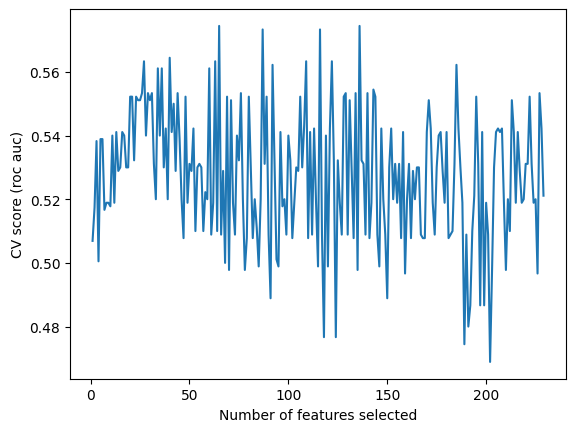

In [ ]:
%%time
rfecv = RFECV(estimator=clf, scoring='roc_auc', n_jobs=-1)
rfecv.fit(x_train_undersampled, y_train_undersampled)

selected_columns = [col for col, selected in zip(x_train.columns, rfecv.support_) if selected]

print(f'Optimal number of features: {rfecv.n_features_}')

plt.figure()
plt.xlabel('Number of features selected')
plt.ylabel('CV score (roc auc)')
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score'] ) + 1), rfecv.cv_results_['mean_test_score'] )
plt.show()

In [ ]:
%%time
custom_classification_report(rfecv.estimator_, x_test[selected_columns], y_test)

CPU times: user 1.22 s, sys: 307 ms, total: 1.53 s
Wall time: 16.5 s
not fraud
precision: 0.6098807495741057
recall: 0.9835164835164835
f1-score: 0.7528916929547845
support: 364


is fraud
precision: 0.5384615384615384
recall: 0.029661016949152543
f1-score: 0.05622489959839358
support: 236


accuracy: 0.6083333333333333


macro avg
precision: 0.5741711440178221
recall: 0.506588750232818
f1-score: 0.40455829627658907
support: 600


weighted avg
precision: 0.5817891932031626
recall: 0.6083333333333333
f1-score: 0.4788694209012707
support: 600


Area Under the Receiver Operating Characteristic Curve (ROC AUC)
Score: 0.574171144017822


CPU times: user 39.9 ms, sys: 4.75 ms, total: 44.7 ms
Wall time: 74.1 ms


In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

def split(df,label):
    X_tr, X_te, Y_tr, Y_te = train_test_split(df, label, test_size=0.25, random_state=42)
    return X_tr, X_te, Y_tr, Y_te



classifiers = ['LinearSVM', 'RadialSVM',
               'Logistic',  'RandomForest',
               'AdaBoost',  'DecisionTree',
               'KNeighbors','GradientBoosting']

models = [svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf'),
          LogisticRegression(max_iter = 1000),
          RandomForestClassifier(n_estimators=200, random_state=0),
          AdaBoostClassifier(random_state = 0),
          DecisionTreeClassifier(random_state=0),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state=0)]


def acc_score(df,label):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    acc = []
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(Y_test,predictions))
        j = j+1
    Score["Accuracy"] = acc
    Score.sort_values(by="Accuracy", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score

def plot(score,x,y,c = "b"):
    gen = [1,2,3,4,5]
    plt.figure(figsize=(6,4))
    ax = sns.pointplot(x=gen, y=score,color = c )
    ax.set(xlabel="Generation", ylabel="Accuracy")
    ax.set(ylim=(x,y))

In [ ]:
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=bool)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population


def fitness_score(population,X_train, X_test, Y_train, Y_test):
    scores = []
    for chromosome in population:
        logmodel.fit(X_train.iloc[:,chromosome],Y_train)
        predictions = logmodel.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(Y_test,predictions))
    scores, population = np.array(scores), np.array(population)
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])


def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen


def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0,len(pop_after_sel),2):
        new_par = []
        child_1 , child_2 = pop_nextgen[i] , pop_nextgen[i+1]
        new_par = np.concatenate((child_1[:len(child_1)//2],child_2[len(child_1)//2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen


def mutation(pop_after_cross,mutation_rate,n_feat):
    mutation_range = int(mutation_rate*n_feat)
    pop_next_gen = []
    for n in range(0,len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = []
        for i in range(0,mutation_range):
            pos = randint(0,n_feat-1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]
        pop_next_gen.append(chromo)
    return pop_next_gen

def generations(size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, Y_train, Y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen,X_train,
                                   X_test, Y_train, Y_test)
        print('Best score in generation',i+1,':',scores[:1])  #2
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [ ]:
score3 = acc_score(x_train,y_train)
score3

,Classifier,Accuracy
0,LinearSVM,0.975000
1,RadialSVM,0.975000
2,Logistic,0.975000
3,RandomForest,0.975000
4,KNeighbors,0.975000
5,AdaBoost,0.971667
6,DecisionTree,0.958333
7,GradientBoosting,0.955000


In [ ]:
logmodel = DecisionTreeClassifier(random_state=0)
chromo_df_pd,score_pd=generations(size=20,n_feat=x_train.shape[1],n_parents=10,mutation_rate=0.20,n_gen=10,
                         X_train = x_train,X_test = x_test,Y_train = y_train,Y_test = y_test)

Best score in generation 1 : [0.9766666666666667]
Best score in generation 2 : [0.9783333333333334]
Best score in generation 3 : [0.9783333333333334]
Best score in generation 4 : [0.9783333333333334]
Best score in generation 5 : [0.98]
Best score in generation 6 : [0.9783333333333334]
Best score in generation 7 : [0.9783333333333334]
Best score in generation 8 : [0.9783333333333334]
Best score in generation 9 : [0.9816666666666667]
Best score in generation 10 : [0.975]


In [ ]:
plot(score_pd,0.96,1.0,c = "gold")

ValueError: All arrays must be of the same length

<Figure size 600x400 with 0 Axes>

In [ ]:
!pip install pyswarms

In [ ]:
import numpy as np
import pyswarms as ps



X = df_preprocessed.drop('isFraud', axis=1).values  # Feature matrix
y = df_preprocessed['isFraud'].values  # Target variable

# Define binary PSO
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# Define bounds
max_bound = 1.0 * np.ones(X.shape[1])
min_bound = 0.0 * np.ones(X.shape[1])
bounds = (min_bound, max_bound)

# Objective function
def f_per_particle(m, alpha):
    """Computes for the objective function per particle

    Inputs
    ------
    m : numpy.ndarray
        Binary mask that can be obtained from BinaryPSO, will
        be used to mask features.
    alpha: float
        Penalty factor to control the number of features selected.

    Returns
    -------
    numpy.ndarray
    """
    total_features = X.shape[1]
    # Apply mask to features
    X_subset = X[:,m>0.5]
    if X_subset.shape[1] == 0:
        return float('inf')
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.3, random_state=42)
    # Fit the model
    clf = RandomForestClassifier(n_estimators=50, random_state=42)
    clf.fit(X_train, y_train)
    # Predict and calculate accuracy
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # Calculate objective
    j = (alpha * (1.0 - accuracy) + (1.0 - alpha) * (1 - (X_subset.shape[1] / total_features)))
    return j

# Define objective function
def f(x, alpha=0.5):
    """Higher-level method to do classification in the
    whole swarm.

    Inputs
    ------
    x: numpy.ndarray of shape (n_particles, dimensions)
        The swarm that will perform the search

    Returns
    -------
    numpy.ndarray of shape (n_particles, )
        The computed loss for each particle
    """
    n_particles = x.shape[0]
    j = [f_per_particle(x[i], alpha) for i in range(n_particles)]
    return np.array(j)

# Initialize swarm
optimizer = ps.single.GlobalBestPSO(n_particles=20, dimensions=X.shape[1], options=options, bounds=bounds)

# Perform optimization
cost, pos = optimizer.optimize(f, iters=100)

2024-04-29 16:16:14,623 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:  10%|█         |10/100, best_cost=0.166


KeyboardInterrupt: 

In [ ]:
#'pos' is the variable containing the best position returned by optimizer.optimize()
best_pos = np.array(pos)

print("Position as NumPy Array:", best_pos)

In [ ]:
# Define a threshold to determine whether a feature is selected
threshold = 0.6

# Create a boolean mask from 'best_pos' based on the threshold
selected_features_mask = best_pos > threshold

# df_cleaned.columns[:-1] gives you all feature names excluding the target variable
feature_names = df_preprocessed.columns[:-1]  # Modify this as necessary

# Use the mask to select the names of the features
selected_features = feature_names[selected_features_mask]
print(len(feature_names))
print(len(selected_features))
print("Selected Features:", selected_features)

In [ ]:
list_features = list(selected_features)
list_features.remove('isFraud')
list_features

In [ ]:
score3 = acc_score(x_train[list_features],y_train)
score3